
# Recreating the figure 2 of the Deep Reinforcement Learning from Human Preferences paper
(https://arxiv.org/pdf/1706.03741.pdf)

 __M2DS - Introduction to reinforcement learning__

__Xavier Loison__
__Thomas Bersani--Veroni__

Freely inspired from : (https://github.com/HumanCompatibleAI/imitation/blob/master/docs/tutorials/5_train_preference_comparisons.ipynb)

For the default settings below the code runs for 90 minutes on AMD Ryzen 7 5800H, RTX 3070 Laptop, 64GB RAM.

```python
policy_timestep_train = 1_000_000 # training step for the policy training
time_step_train = 2_000_000 # training step for the agents' training
eval_freq = 5_000 # evaluation frequency for the agents' training
queries_number_list = [350,700,1400] # number of synthetic queries for the reward training
result_smoothing = 10 # smoothing of the result curve with a moving average
```

In [8]:
import random
from imitation.algorithms import preference_comparisons
from imitation.rewards.reward_nets import BasicRewardNet
from imitation.util.networks import RunningNorm
from imitation.util.util import make_vec_env
from imitation.policies.base import FeedForward32Policy, NormalizeFeaturesExtractor
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.callbacks import EvalCallback
import matplotlib.pyplot as plt
from imitation.rewards.reward_wrapper import RewardVecEnvWrapper
import gym
from stable_baselines3 import PPO
import numpy as np

rng = np.random.default_rng(0)

venv = make_vec_env('Pendulum-v1', rng=rng)

Query schedule: [35, 89, 71, 59, 51, 45]
Requested 7000 transitions but only 0 in buffer. Sampling 7000 additional transitions.
Creating fragment pairs
Gathering preferences
Dataset now contains 35 comparisons


Training reward model: 100%|██████████| 5/5 [00:00<00:00, 20.92it/s]

Training agent for 200000 timesteps


----------------------------------------------------
| raw/                                 |           |
|    agent/rollout/ep_len_mean         | 200       |
|    agent/rollout/ep_rew_mean         | -1.45e+03 |
|    agent/rollout/ep_rew_wrapped_mean | 56.6      |
|    agent/time/fps                    | 7474      |
|    agent/time/iterations             | 1         |
|    agent/time/time_elapsed           | 0         |
|    agent/time/total_timesteps        | 2048      |
----------------------------------------------------
------------------------------------------------------
| raw/                                 |             |
|    agent/rollout/ep_len_mean         | 200         |
|    agent/rollout/ep_rew_mean         | -1.3e+03    |
|    agent/rollout/ep_rew_wrapped_mean | 51.4        |
|    agent/time/fps                    | 3645        |
|    agent/time/iterations             | 2           |
|    agent/time/time_elapsed           | 1           |
|    agent/time/total_timestep

Training reward model: 100%|██████████| 5/5 [00:00<00:00,  6.44it/s]

Training agent for 200000 timesteps


------------------------------------------------------
| raw/                                 |             |
|    agent/rollout/ep_len_mean         | 200         |
|    agent/rollout/ep_rew_mean         | -1.43e+03   |
|    agent/rollout/ep_rew_wrapped_mean | 63.4        |
|    agent/time/fps                    | 7447        |
|    agent/time/iterations             | 1           |
|    agent/time/time_elapsed           | 0           |
|    agent/time/total_timesteps        | 202752      |
|    agent/train/approx_kl             | 0.003694528 |
|    agent/train/clip_fraction         | 0.028       |
|    agent/train/clip_range            | 0.2         |
|    agent/train/entropy_loss          | -1.21       |
|    agent/train/explained_variance    | 0.0529      |
|    agent/train/learning_rate         | 0.0003      |
|    agent/train/loss                  | 6.35        |
|    agent/train/n_updates             | 980         |
|    agent/train/policy_gradient_loss  | -0.000523   |
|    agent

Training reward model: 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]

Training agent for 200000 timesteps


------------------------------------------------------
| raw/                                 |             |
|    agent/rollout/ep_len_mean         | 200         |
|    agent/rollout/ep_rew_mean         | -1.37e+03   |
|    agent/rollout/ep_rew_wrapped_mean | 68.6        |
|    agent/time/fps                    | 6820        |
|    agent/time/iterations             | 1           |
|    agent/time/time_elapsed           | 0           |
|    agent/time/total_timesteps        | 403456      |
|    agent/train/approx_kl             | 0.008551522 |
|    agent/train/clip_fraction         | 0.0563      |
|    agent/train/clip_range            | 0.2         |
|    agent/train/entropy_loss          | -0.867      |
|    agent/train/explained_variance    | -0.0225     |
|    agent/train/learning_rate         | 0.0003      |
|    agent/train/loss                  | 8.08        |
|    agent/train/n_updates             | 1960        |
|    agent/train/policy_gradient_loss  | -0.00248    |
|    agent

Training reward model: 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

Training agent for 200000 timesteps


-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -1.22e+03    |
|    agent/rollout/ep_rew_wrapped_mean | 41.1         |
|    agent/time/fps                    | 6895         |
|    agent/time/iterations             | 1            |
|    agent/time/time_elapsed           | 0            |
|    agent/time/total_timesteps        | 604160       |
|    agent/train/approx_kl             | 0.0112508545 |
|    agent/train/clip_fraction         | 0.101        |
|    agent/train/clip_range            | 0.2          |
|    agent/train/entropy_loss          | -0.707       |
|    agent/train/explained_variance    | 0.2          |
|    agent/train/learning_rate         | 0.0003       |
|    agent/train/loss                  | 4.56         |
|    agent/train/n_updates             | 2940         |
|    agent/train/policy_gradient_loss  | -0.0010

Training reward model: 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

Training agent for 200000 timesteps


-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -1.17e+03    |
|    agent/rollout/ep_rew_wrapped_mean | 30.9         |
|    agent/time/fps                    | 6041         |
|    agent/time/iterations             | 1            |
|    agent/time/time_elapsed           | 0            |
|    agent/time/total_timesteps        | 804864       |
|    agent/train/approx_kl             | 0.0027386276 |
|    agent/train/clip_fraction         | 0.0392       |
|    agent/train/clip_range            | 0.2          |
|    agent/train/entropy_loss          | -0.707       |
|    agent/train/explained_variance    | 0.425        |
|    agent/train/learning_rate         | 0.0003       |
|    agent/train/loss                  | 1.41         |
|    agent/train/n_updates             | 3920         |
|    agent/train/policy_gradient_loss  | 0.00016

Training reward model: 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]

Training agent for 200000 timesteps


-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -996         |
|    agent/rollout/ep_rew_wrapped_mean | 30.7         |
|    agent/time/fps                    | 6692         |
|    agent/time/iterations             | 1            |
|    agent/time/time_elapsed           | 0            |
|    agent/time/total_timesteps        | 1005568      |
|    agent/train/approx_kl             | 0.0074540274 |
|    agent/train/clip_fraction         | 0.0759       |
|    agent/train/clip_range            | 0.2          |
|    agent/train/entropy_loss          | -0.788       |
|    agent/train/explained_variance    | 0.23         |
|    agent/train/learning_rate         | 0.0003       |
|    agent/train/loss                  | 4.56         |
|    agent/train/n_updates             | 4900         |
|    agent/train/policy_gradient_loss  | -0.0020

d:\Travail\M2DS\Reinforcement Learning\imitation_test\.venv\lib\site-packages\stable_baselines3\common\callbacks.py:399: UserWarning: Training and eval env are not of the same type<imitation.rewards.reward_wrapper.RewardVecEnvWrapper object at 0x00000214531EF5E0> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x000002145A255F70>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=40000, episode_reward=-1024.11 +/- 24.05
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=80000, episode_reward=-1135.24 +/- 185.12
Episode length: 200.00 +/- 0.00
Eval num_timesteps=120000, episode_reward=-866.09 +/- 327.49
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=160000, episode_reward=-866.47 +/- 97.86
Episode length: 200.00 +/- 0.00
Eval num_timesteps=200000, episode_reward=-283.51 +/- 114.17
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=240000, episode_reward=-496.27 +/- 396.74
Episode length: 200.00 +/- 0.00
Eval num_timesteps=280000, episode_reward=-304.47 +/- 155.92
Episode length: 200.00 +/- 0.00
Eval num_timesteps=320000, episode_reward=-193.72 +/- 56.32
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=360000, episode_reward=-517.78 +/- 302.26
Episode length: 200.00 +/- 0.00
Eval num_timesteps=400000, episode_reward=-145.47 +/- 114.67
Episode length: 2

Training reward model: 100%|██████████| 5/5 [00:00<00:00, 10.04it/s]

Training agent for 200000 timesteps


----------------------------------------------------
| raw/                                 |           |
|    agent/rollout/ep_len_mean         | 200       |
|    agent/rollout/ep_rew_mean         | -1.36e+03 |
|    agent/rollout/ep_rew_wrapped_mean | 55        |
|    agent/time/fps                    | 6481      |
|    agent/time/iterations             | 1         |
|    agent/time/time_elapsed           | 0         |
|    agent/time/total_timesteps        | 2048      |
----------------------------------------------------
------------------------------------------------------
| raw/                                 |             |
|    agent/rollout/ep_len_mean         | 200         |
|    agent/rollout/ep_rew_mean         | -1.27e+03   |
|    agent/rollout/ep_rew_wrapped_mean | 51.7        |
|    agent/time/fps                    | 3192        |
|    agent/time/iterations             | 2           |
|    agent/time/time_elapsed           | 1           |
|    agent/time/total_timestep

Training reward model: 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

Training agent for 200000 timesteps


-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -1.13e+03    |
|    agent/rollout/ep_rew_wrapped_mean | 43.1         |
|    agent/time/fps                    | 6263         |
|    agent/time/iterations             | 1            |
|    agent/time/time_elapsed           | 0            |
|    agent/time/total_timesteps        | 202752       |
|    agent/train/approx_kl             | 0.0037558614 |
|    agent/train/clip_fraction         | 0.054        |
|    agent/train/clip_range            | 0.2          |
|    agent/train/entropy_loss          | -1.23        |
|    agent/train/explained_variance    | 0.0563       |
|    agent/train/learning_rate         | 0.0003       |
|    agent/train/loss                  | 3.36         |
|    agent/train/n_updates             | 980          |
|    agent/train/policy_gradient_loss  | -0.0024

Training reward model: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

Training agent for 200000 timesteps


-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -1.22e+03    |
|    agent/rollout/ep_rew_wrapped_mean | 58.3         |
|    agent/time/fps                    | 6077         |
|    agent/time/iterations             | 1            |
|    agent/time/time_elapsed           | 0            |
|    agent/time/total_timesteps        | 403456       |
|    agent/train/approx_kl             | 0.0049354364 |
|    agent/train/clip_fraction         | 0.0346       |
|    agent/train/clip_range            | 0.2          |
|    agent/train/entropy_loss          | -1.02        |
|    agent/train/explained_variance    | 0.762        |
|    agent/train/learning_rate         | 0.0003       |
|    agent/train/loss                  | 6.17         |
|    agent/train/n_updates             | 1960         |
|    agent/train/policy_gradient_loss  | -0.0002

Training reward model: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

Training agent for 200000 timesteps


-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -963         |
|    agent/rollout/ep_rew_wrapped_mean | 24.8         |
|    agent/time/fps                    | 6490         |
|    agent/time/iterations             | 1            |
|    agent/time/time_elapsed           | 0            |
|    agent/time/total_timesteps        | 604160       |
|    agent/train/approx_kl             | 0.0044246158 |
|    agent/train/clip_fraction         | 0.0552       |
|    agent/train/clip_range            | 0.2          |
|    agent/train/entropy_loss          | -0.81        |
|    agent/train/explained_variance    | 0.552        |
|    agent/train/learning_rate         | 0.0003       |
|    agent/train/loss                  | 2.32         |
|    agent/train/n_updates             | 2940         |
|    agent/train/policy_gradient_loss  | -0.0040

Training reward model: 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

Training agent for 200000 timesteps


-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -293         |
|    agent/rollout/ep_rew_wrapped_mean | 35.2         |
|    agent/time/fps                    | 6380         |
|    agent/time/iterations             | 1            |
|    agent/time/time_elapsed           | 0            |
|    agent/time/total_timesteps        | 804864       |
|    agent/train/approx_kl             | 0.0035200513 |
|    agent/train/clip_fraction         | 0.0324       |
|    agent/train/clip_range            | 0.2          |
|    agent/train/entropy_loss          | -0.621       |
|    agent/train/explained_variance    | 0.406        |
|    agent/train/learning_rate         | 0.0003       |
|    agent/train/loss                  | 2.08         |
|    agent/train/n_updates             | 3920         |
|    agent/train/policy_gradient_loss  | 7.41e-0

Training reward model: 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

Training agent for 200000 timesteps


------------------------------------------------------
| raw/                                 |             |
|    agent/rollout/ep_len_mean         | 200         |
|    agent/rollout/ep_rew_mean         | -386        |
|    agent/rollout/ep_rew_wrapped_mean | 34.1        |
|    agent/time/fps                    | 7393        |
|    agent/time/iterations             | 1           |
|    agent/time/time_elapsed           | 0           |
|    agent/time/total_timesteps        | 1005568     |
|    agent/train/approx_kl             | 0.007964721 |
|    agent/train/clip_fraction         | 0.0547      |
|    agent/train/clip_range            | 0.2         |
|    agent/train/entropy_loss          | -0.672      |
|    agent/train/explained_variance    | 0.353       |
|    agent/train/learning_rate         | 0.0003      |
|    agent/train/loss                  | 6.93        |
|    agent/train/n_updates             | 4900        |
|    agent/train/policy_gradient_loss  | 0.00129     |
|    agent

d:\Travail\M2DS\Reinforcement Learning\imitation_test\.venv\lib\site-packages\stable_baselines3\common\callbacks.py:399: UserWarning: Training and eval env are not of the same type<imitation.rewards.reward_wrapper.RewardVecEnvWrapper object at 0x000002144CC46040> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x000002145A255F70>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=40000, episode_reward=-809.36 +/- 88.16
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=80000, episode_reward=-393.08 +/- 303.26
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=120000, episode_reward=-368.90 +/- 205.31
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=160000, episode_reward=-278.17 +/- 124.51
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=200000, episode_reward=-201.85 +/- 99.60
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=240000, episode_reward=-251.11 +/- 157.32
Episode length: 200.00 +/- 0.00
Eval num_timesteps=280000, episode_reward=-459.76 +/- 535.77
Episode length: 200.00 +/- 0.00
Eval num_timesteps=320000, episode_reward=-176.87 +/- 126.61
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=360000, episode_reward=-488.30 +/- 358.63
Episode length: 200.00 +/- 0.00
Eval num_timesteps=400000, episode_

Training reward model: 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]

Training agent for 200000 timesteps


----------------------------------------------------
| raw/                                 |           |
|    agent/rollout/ep_len_mean         | 200       |
|    agent/rollout/ep_rew_mean         | -1.24e+03 |
|    agent/rollout/ep_rew_wrapped_mean | 54.8      |
|    agent/time/fps                    | 7110      |
|    agent/time/iterations             | 1         |
|    agent/time/time_elapsed           | 0         |
|    agent/time/total_timesteps        | 2048      |
----------------------------------------------------
-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -1.23e+03    |
|    agent/rollout/ep_rew_wrapped_mean | 53           |
|    agent/time/fps                    | 3521         |
|    agent/time/iterations             | 2            |
|    agent/time/time_elapsed           | 1            |
|    agent/time/total_

Training reward model: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

Training agent for 200000 timesteps


-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -1.44e+03    |
|    agent/rollout/ep_rew_wrapped_mean | 54.7         |
|    agent/time/fps                    | 7757         |
|    agent/time/iterations             | 1            |
|    agent/time/time_elapsed           | 0            |
|    agent/time/total_timesteps        | 202752       |
|    agent/train/approx_kl             | 0.0033414692 |
|    agent/train/clip_fraction         | 0.0133       |
|    agent/train/clip_range            | 0.2          |
|    agent/train/entropy_loss          | -1.14        |
|    agent/train/explained_variance    | 0.072        |
|    agent/train/learning_rate         | 0.0003       |
|    agent/train/loss                  | 4.26         |
|    agent/train/n_updates             | 980          |
|    agent/train/policy_gradient_loss  | -0.0025

Training reward model: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

Training agent for 200000 timesteps


------------------------------------------------------
| raw/                                 |             |
|    agent/rollout/ep_len_mean         | 200         |
|    agent/rollout/ep_rew_mean         | -1.12e+03   |
|    agent/rollout/ep_rew_wrapped_mean | 48.9        |
|    agent/time/fps                    | 7186        |
|    agent/time/iterations             | 1           |
|    agent/time/time_elapsed           | 0           |
|    agent/time/total_timesteps        | 403456      |
|    agent/train/approx_kl             | 0.009474097 |
|    agent/train/clip_fraction         | 0.0887      |
|    agent/train/clip_range            | 0.2         |
|    agent/train/entropy_loss          | -1.02       |
|    agent/train/explained_variance    | 0.488       |
|    agent/train/learning_rate         | 0.0003      |
|    agent/train/loss                  | 2.95        |
|    agent/train/n_updates             | 1960        |
|    agent/train/policy_gradient_loss  | 0.00275     |
|    agent

Training reward model: 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]

Training agent for 200000 timesteps


-------------------------------------------------------
| raw/                                 |              |
|    agent/rollout/ep_len_mean         | 200          |
|    agent/rollout/ep_rew_mean         | -986         |
|    agent/rollout/ep_rew_wrapped_mean | 54           |
|    agent/time/fps                    | 7037         |
|    agent/time/iterations             | 1            |
|    agent/time/time_elapsed           | 0            |
|    agent/time/total_timesteps        | 604160       |
|    agent/train/approx_kl             | 0.0065483963 |
|    agent/train/clip_fraction         | 0.0556       |
|    agent/train/clip_range            | 0.2          |
|    agent/train/entropy_loss          | -0.761       |
|    agent/train/explained_variance    | 0.569        |
|    agent/train/learning_rate         | 0.0003       |
|    agent/train/loss                  | 9.22         |
|    agent/train/n_updates             | 2940         |
|    agent/train/policy_gradient_loss  | -0.0015

Training reward model: 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]

Training agent for 200000 timesteps


------------------------------------------------------
| raw/                                 |             |
|    agent/rollout/ep_len_mean         | 200         |
|    agent/rollout/ep_rew_mean         | -652        |
|    agent/rollout/ep_rew_wrapped_mean | 47          |
|    agent/time/fps                    | 6440        |
|    agent/time/iterations             | 1           |
|    agent/time/time_elapsed           | 0           |
|    agent/time/total_timesteps        | 804864      |
|    agent/train/approx_kl             | 0.008824559 |
|    agent/train/clip_fraction         | 0.0765      |
|    agent/train/clip_range            | 0.2         |
|    agent/train/entropy_loss          | -0.461      |
|    agent/train/explained_variance    | 0.578       |
|    agent/train/learning_rate         | 0.0003      |
|    agent/train/loss                  | 7.02        |
|    agent/train/n_updates             | 3920        |
|    agent/train/policy_gradient_loss  | 0.00348     |
|    agent

Training reward model: 100%|██████████| 5/5 [00:08<00:00,  1.79s/it]

Training agent for 200000 timesteps


------------------------------------------------------
| raw/                                 |             |
|    agent/rollout/ep_len_mean         | 200         |
|    agent/rollout/ep_rew_mean         | -648        |
|    agent/rollout/ep_rew_wrapped_mean | 46.5        |
|    agent/time/fps                    | 6736        |
|    agent/time/iterations             | 1           |
|    agent/time/time_elapsed           | 0           |
|    agent/time/total_timesteps        | 1005568     |
|    agent/train/approx_kl             | 0.017928055 |
|    agent/train/clip_fraction         | 0.165       |
|    agent/train/clip_range            | 0.2         |
|    agent/train/entropy_loss          | -0.561      |
|    agent/train/explained_variance    | 0.787       |
|    agent/train/learning_rate         | 0.0003      |
|    agent/train/loss                  | 24.5        |
|    agent/train/n_updates             | 4900        |
|    agent/train/policy_gradient_loss  | 0.0024      |
|    agent

d:\Travail\M2DS\Reinforcement Learning\imitation_test\.venv\lib\site-packages\stable_baselines3\common\callbacks.py:399: UserWarning: Training and eval env are not of the same type<imitation.rewards.reward_wrapper.RewardVecEnvWrapper object at 0x0000021450641280> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x000002145A255F70>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=40000, episode_reward=-681.18 +/- 56.99
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=80000, episode_reward=-463.99 +/- 362.23
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=120000, episode_reward=-308.95 +/- 227.20
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=160000, episode_reward=-293.76 +/- 134.01
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=200000, episode_reward=-874.67 +/- 559.63
Episode length: 200.00 +/- 0.00
Eval num_timesteps=240000, episode_reward=-523.44 +/- 500.69
Episode length: 200.00 +/- 0.00
Eval num_timesteps=280000, episode_reward=-250.47 +/- 114.70
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=320000, episode_reward=-181.86 +/- 127.99
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=360000, episode_reward=-431.22 +/- 209.43
Episode length: 200.00 +/- 0.00
Eval num_timesteps=400000, episode

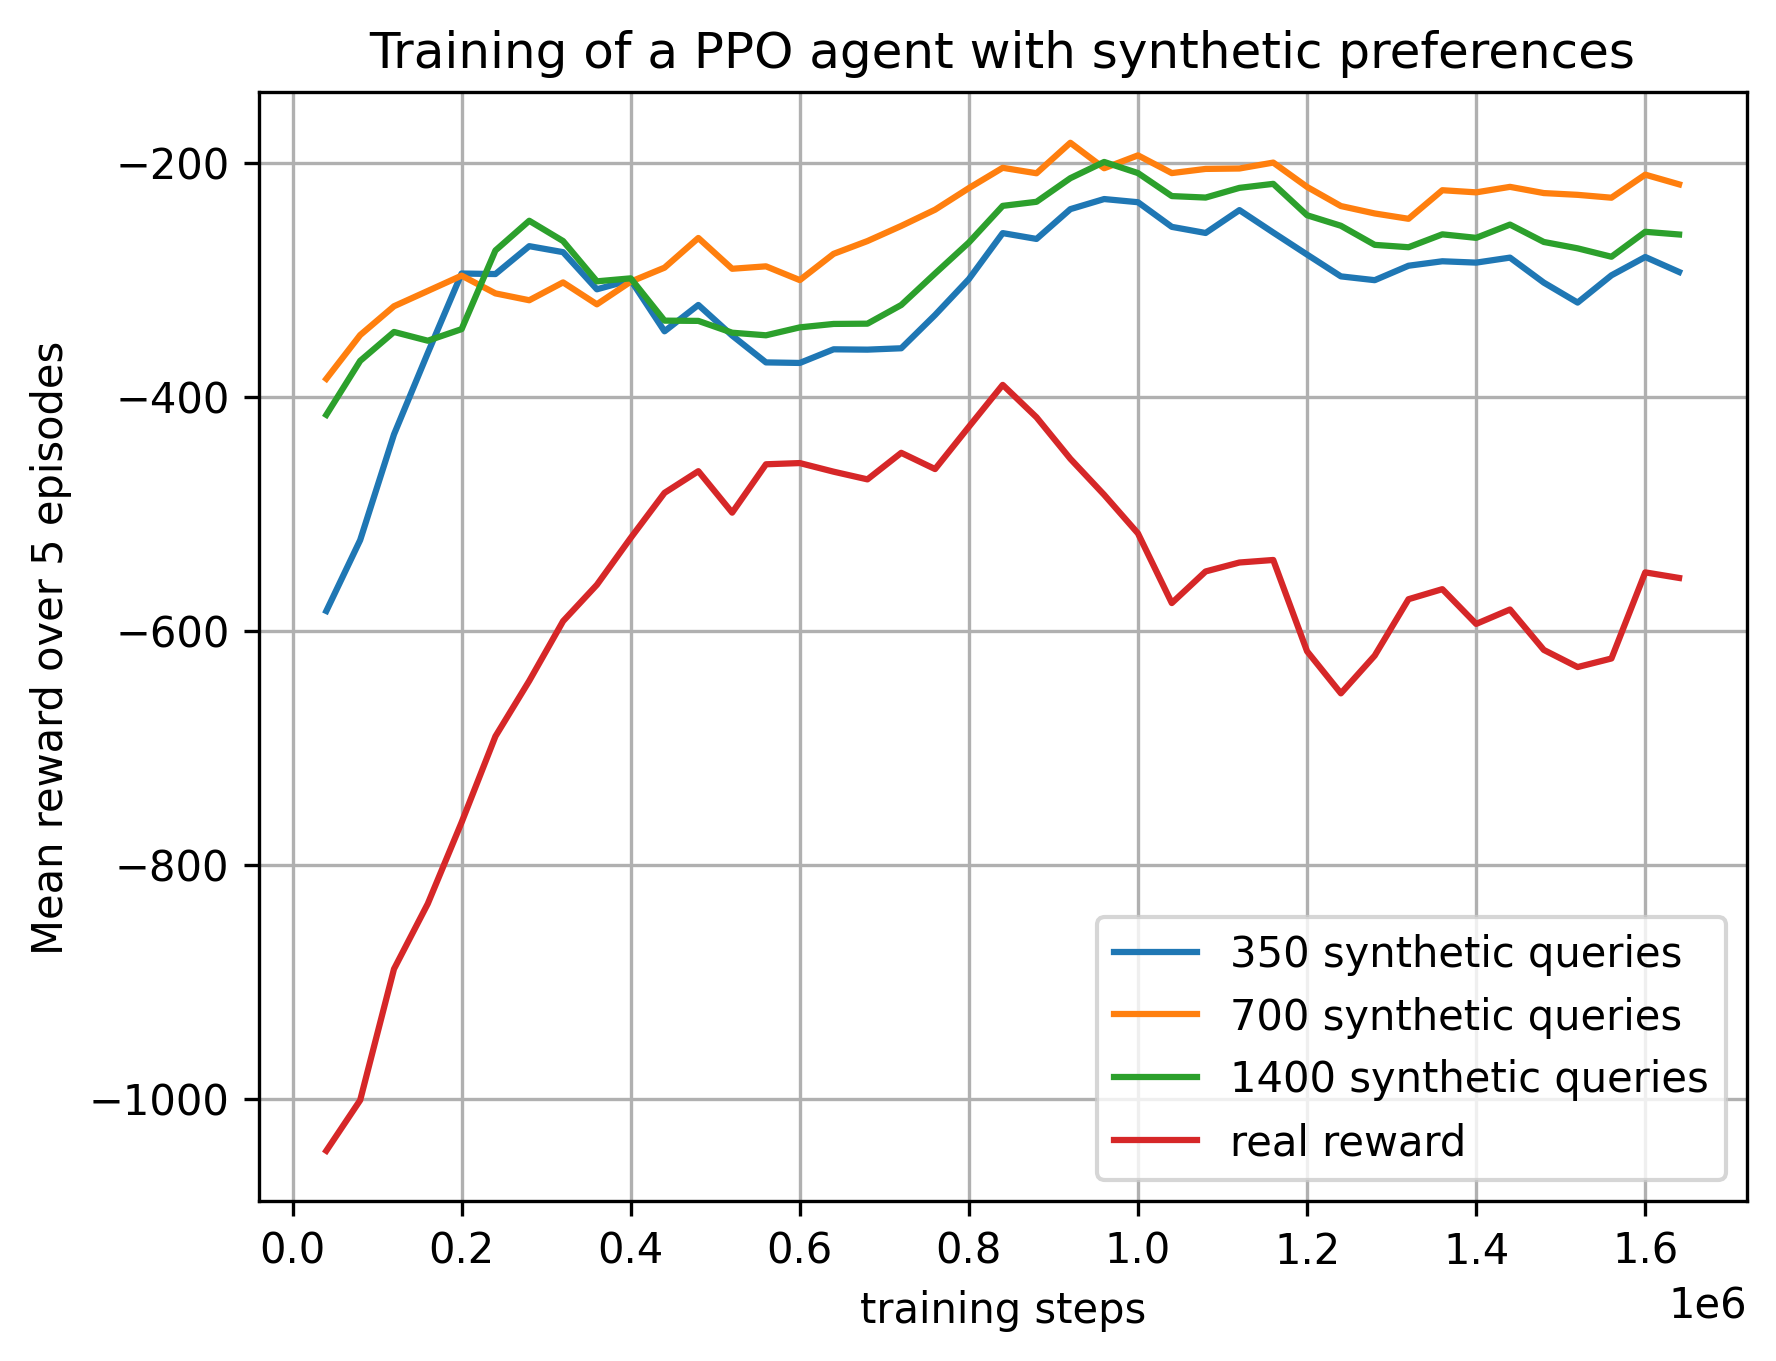

In [9]:

policy_timestep_train = 1_000_000 # training step for the policy training
time_step_train = 2_000_000 # training step for the agents' training
eval_freq = 5_000 # evaluation frequency for the agents' training
queries_number_list = [350,700,1400] # number of synthetic queries for the reward training
result_smoothing = 10 # smoothing of the result curve with a moving average

# --- training the reward network with synthetic preferences ---

for total_compa in queries_number_list:
    obs = venv.reset()
    reward_net = BasicRewardNet(
    venv.observation_space, venv.action_space, normalize_input_layer=RunningNorm
    )

    fragmenter = preference_comparisons.RandomFragmenter(
        warning_threshold=0,
        rng=rng,
    )
    gatherer = preference_comparisons.SyntheticGatherer(rng=rng)
    preference_model = preference_comparisons.PreferenceModel(reward_net)
    reward_trainer = preference_comparisons.BasicRewardTrainer(
        preference_model=preference_model,
        loss=preference_comparisons.CrossEntropyRewardLoss(),
        epochs=5,
        rng=rng,
    )

    agent = PPO(
        policy=FeedForward32Policy,
        policy_kwargs=dict(
            features_extractor_class=NormalizeFeaturesExtractor,
            features_extractor_kwargs=dict(normalize_class=RunningNorm),
        ),
        env=venv,
        seed=0,
        n_steps=2048 // venv.num_envs,
        batch_size=64,
        ent_coef=0.0,
        learning_rate=0.0003,
        n_epochs=10,
    )

    trajectory_generator = preference_comparisons.AgentTrainer(
        algorithm=agent,
        reward_fn=reward_net,
        venv=venv,
        exploration_frac=0.0,
        rng=rng,
    )

    pref_comparisons = preference_comparisons.PreferenceComparisons(
        trajectory_generator,
        reward_net,
        num_iterations=5,
        fragmenter=fragmenter,
        preference_gatherer=gatherer,
        reward_trainer=reward_trainer,
        fragment_length=100,
        transition_oversampling=1,
        initial_comparison_frac=0.1,
        allow_variable_horizon=False,
        initial_epoch_multiplier=1,
    )
    
    pref_comparisons.train(
    total_timesteps=policy_timestep_train,  
    total_comparisons=total_compa  
    )

    learned_reward_venv = RewardVecEnvWrapper(venv, reward_net.predict)

    # --- training the agents with the synthetic preferences rewards ---

    obs = venv.reset()
    learner_preference = PPO(
        policy=MlpPolicy,
        env=learned_reward_venv,
        seed=0,
        batch_size=64,
        ent_coef=0.0,
        learning_rate=0.0003,
        n_epochs=10,
        n_steps=64,
    )
    learner_preference.learn(time_step_train,callback=EvalCallback(venv, 
                                log_path="./logs_pref"+str(total_compa)+"/", eval_freq=eval_freq,
                                deterministic=True, render=False))  # Note: set to 100000 to train a proficient expert


# --- training an agent with the real reward ---

obs = venv.reset()
learner_ground_truth = PPO(
    policy=MlpPolicy,
    env=venv,
    seed=0,
    batch_size=64,
    ent_coef=0.0,
    learning_rate=0.0003,
    n_epochs=10,
    n_steps=64,
)
learner_ground_truth.learn(time_step_train,callback=EvalCallback(venv, 
                            log_path="./logs_truth/", eval_freq=eval_freq,
                            deterministic=True, render=False))  # Note: set to 100000 to train a proficient expert


# --- plotting the results ---
plt.figure(dpi=300)
for total_compa in queries_number_list:

    file_pref = np.load( "./logs_pref"+str(total_compa)+"/evaluations.npz")
    time_steps = file_pref['timesteps']
    resultats_pref = file_pref['results']
    array =np.mean(resultats_pref,axis=-1)
    smoothed_array = np.convolve(array, np.ones((result_smoothing,))/result_smoothing, mode='valid')
    plt.plot(time_steps[:len(smoothed_array)],smoothed_array,label=str(total_compa)+" synthetic queries")

file_ground_truth = np.load( 'logs_truth\evaluations.npz')
time_steps = file_ground_truth['timesteps']
resultats_ground_truth = file_ground_truth['results']
array =np.mean(resultats_ground_truth,axis=-1)
smoothed_array = np.convolve(array, np.ones((result_smoothing,))/result_smoothing, mode='valid')
plt.plot(time_steps[:len(smoothed_array)],smoothed_array,label="real reward")

plt.xlabel("training steps")
plt.ylabel("Mean reward over 5 episodes")
plt.title(' Training of a PPO agent with synthetic preferences ')
plt.grid()
plt.legend()

filename = "training_"
for q_nb in queries_number_list:
    filename += str(q_nb)+"_"
filename += ".png"
plt.savefig(filename)

